# PROJETO 3 - Análise de Condições Ocupacionais e Fatores Associados ao Trabalho Remoto

## **Introdução**

O trabalho remoto tem ganhado destaque nos últimos anos, especialmente com os avanços tecnológicos e mudanças no mercado de trabalho. Este projeto busca compreender como as condições ocupacionais e fatores associados, como nível de instrução, rendimento mensal e tipo de ocupação, influenciam a possibilidade de trabalho remoto no Brasil.

---

## **Objetivos**

- Identificar os fatores mais relevantes associados ao trabalho remoto.
- Construir modelos preditivos para estimar a probabilidade de trabalho remoto com base em condições ocupacionais.

---

## **Metodologia**

### **1. Fonte de Dados**
Os dados utilizados foram extraídos da Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD), especificamente do **primeiro trimestre de 2023**.

### **2. Pré-Processamento**

## Variável Principal (Target)

A variável principal utilizada como **target** foi **`trabalho_remoto`**, que foi criada a partir da variável `VD4009` (Posição na ocupação e categoria do emprego no trabalho principal). O mapeamento para "Sim" ou "Não" foi realizado com base na elegibilidade para trabalho remoto, considerando as categorias de ocupação.

- **Sim (Trabalho Remoto):**
  - Empregado no setor privado com carteira assinada.
  - Empregado no setor público com carteira assinada.
  - Conta própria em atividades potencialmente remotas.
  - Militares e servidores estatutários em funções administrativas.
  - Profissionais liberais (diretores, técnicos, etc.).

- **Não (Não Trabalho Remoto):**
  - Trabalhador doméstico.
  - Trabalhador familiar auxiliar.
  - Ocupações manuais ou de difícil adaptação ao remoto.

**Refinamento com Nível de Instrução:** Adicionamos um critério de refinamento usando a variável VD3004, que representa o nível de instrução mais elevado alcançado. Apenas ocupações com nível técnico ou superior foram consideradas adequadas ao trabalho remoto.

**Filtragem Adicional com Ocupações Remotas:** Ocupações específicas, representadas pela coluna VD4011, foram usadas para ajustar ainda mais os critérios.

## Variáveis Explicativas (Features)

As variáveis explicativas selecionadas foram:

| **Código da Variável** | **Nome da Variável**                                                                                     | **Justificativa**                                                                                   |
|-------------------------|---------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------|
| **VD3005**              | Anos de estudo padronizado para o Ensino Fundamental (Sistema de 9 anos)                               | Nível de instrução pode influenciar a possibilidade de trabalho remoto.                             |
| **VD4011**              | Grupamentos ocupacionais do trabalho principal                                                         | Certas ocupações, como cargos administrativos e técnicos, são mais adequadas ao trabalho remoto.    |
| **VD4010**              | Grupamentos de atividade principal do empreendimento do trabalho principal                             | Determinados setores, como tecnologia e finanças, têm maior probabilidade de trabalho remoto.       |
| **VD4014**              | Faixa das horas efetivamente trabalhadas na semana de referência em todos os trabalhos                 | Trabalhadores remotos podem ter horas mais flexíveis.                                               |
| **VD4020**              | Rendimento mensal efetivo de todos os trabalhos                                                       | Trabalhos remotos podem estar associados a rendimentos mais elevados.                               |
| **VD4031**              | Horas habitualmente trabalhadas por semana em todos os trabalhos                                       | Padrões de trabalho remoto podem refletir em horas trabalhadas habitualmente.                       |
| **VD3004**              | Nível de instrução mais elevado alcançado                                                              | Níveis superiores de instrução frequentemente estão associados ao trabalho remoto.                  |

---
- **Seleção de Variáveis**:
  Foram selecionadas 13 variáveis relacionadas às condições ocupacionais, como:
  - **Nível de Instrução (VD3004)**.
  - **Rendimento Mensal Efetivo (VD4020)**.
  - **Faixa de Horas Trabalhadas (VD4014)**.
  - **Grupamentos Ocupacionais (VD4011)**.

- **Criação da Variável Alvo**:
  A variável `trabalho_remoto` foi criada para indicar se a ocupação permite trabalho remoto, com base em:
  - Tipo de ocupação.
  - Nível de instrução.
  - Grupamentos de atividades.

### **3. Modelagem**
- **Modelos Utilizados**:
  - **Regressão Logística**: Para capturar relações lineares entre as variáveis explicativas e o trabalho remoto.
  - **Random Forest**: Para capturar relações não lineares e avaliar a importância das variáveis.

## **Revisão Literária**

### Impactos da pandemia no trabalho remoto

"A pandemia COVID-19 foi o maior impulsionador do trabalho remoto, marcando um aumento global no número de profissionais que realizam suas atividades de casa. Porém, apesar da maior produtividade percebida, a satisfação dos trabalhadores em home office é geralmente menor quando comparada ao trabalho presencial." (Graça, 2021)  
UTL REPOSITORY

### Desigualdade de Renda e Acesso à Tecnologia
Em países em desenvolvimento, o acesso à educação e às tecnologias de comunicação tem potencial para reduzir desigualdades de renda. Tanbir Hossain observa que a conectividade digital em áreas rurais pode contribuir para oportunidades de trabalho e inclusão no mercado para grupos historicamente marginalizados. Este acesso pode nivelar as condições de competitividade, especialmente onde há infraestrutura limitada (Hossain, 2021).

### Aspectos ergonômicos e tecnológicos

"O teletrabalho não é apenas uma questão de localização física, mas também da adoção de novas tecnologias que possibilitam a realização das atividades à distância. Contudo, fatores como a precariedade da estrutura domiciliar podem impactar negativamente o desempenho e a saúde do trabalhador." (Bonnet et al., 2020)  
REVISTAFT

### Flexibilidade e desafios no trabalho remoto

"Trabalhadores consideram a flexibilidade de horários um benefício importante do regime remoto, mas enfrentam desafios como isolamento social, conflitos entre vida profissional e pessoal, e pressão por resultados." (Filardi, Castro e Zanini, 2020)  
REVISTAFT

---

In [2]:
import pandas as pd

# PRIMEIRO TRIMESTRE DE 2023
url1 = 'https://www.dropbox.com/scl/fi/fv6fli3jyuinijotw9v6b/pnad23_1.csv?rlkey=1nq6xfd1fn7guz4nyhvwslp7p&st=qpr7odgu&dl=1'



In [3]:
pnad23_1_all = pd.read_csv(url1, nrows=10)
pnad23_1_all.head(), pnad23_1_all.dtypes

(    Ano  Trimestre  UF  Capital  RM_RIDE        UPA  Estrato  V1008  V1014  \
 0  2023          1  11       11      NaN  110000016  1110011      1     10   
 1  2023          1  11       11      NaN  110000016  1110011      1     10   
 2  2023          1  11       11      NaN  110000016  1110011      2     10   
 3  2023          1  11       11      NaN  110000016  1110011      3     10   
 4  2023          1  11       11      NaN  110000016  1110011      3     10   
 
    V1016  ...    V1028191  V1028192  V1028193  V1028194  V1028195    V1028196  \
 0      2  ...  439.015749       0.0       0.0       0.0       0.0  378.334135   
 1      2  ...  439.015749       0.0       0.0       0.0       0.0  378.334135   
 2      2  ...  202.706446       0.0       0.0       0.0       0.0  184.494208   
 3      2  ...  447.575908       0.0       0.0       0.0       0.0  365.848120   
 4      2  ...  447.575908       0.0       0.0       0.0       0.0  365.848120   
 
    V1028197    V1028198    V1


### Seleção de Variáveis para Análise

Nesta etapa, estamos criando uma lista com as variáveis de interesse para a análise. 

- **VD3005**: Anos de estudo padronizado para o Ensino Fundamental (Sistema de 9 anos) - 1º tri/2012 - atual
- **VD4009**: Posição na ocupação e categoria do emprego no trabalho principal - 1º tri/2012 - atual
- **VD4010**: Grupamentos de atividade principal do empreendimento do trabalho principal - 1º tri/2012 - atual
- **VD4011**: Grupamentos ocupacionais do trabalho principal - 1º tri/2012 - atual
- **VD4014**: Faixa das horas efetivamente trabalhadas na semana de referência em todos os trabalhos - 1º tri/2012 - atual
- **VD4020**: Rendimento mensal efetivo de todos os trabalhos - 1º tri/2012 - atual
- **VD4031**: Horas habitualmente trabalhadas por semana em todos os trabalhos - 1º tri/2012 - atual
- **VD4007**: Posição na ocupação no trabalho principal da semana de referência - 1º tri/2012 - atual
- **VD4008**: Posição na ocupação no trabalho principal com subcategorias - 1º tri/2012 - atual
- **VD3004**: Nível de instrução mais elevado alcançado - 1º tri/2012 - atual
- **VD4016**: Rendimento mensal habitual do trabalho principal - 1º tri/2012 - atual
- **VD4018**: Tipo de remuneração habitualmente recebida em todos os trabalhos - 1º tri/2012 - atual
- **VD4035**: Horas efetivamente trabalhadas na semana de referência em todos os trabalhos - 1º tri/2012 - atual

Em seguida, utilizamos essas variáveis para carregar os dados relevantes do arquivo CSV, criando o DataFrame `df_limpo`.


In [4]:
# Criando uma lista com as variáveis comentários de nome e semestre/periodo
colunas = [
    "VD3005",  # Anos de estudo padronizado para o Ensino Fundamental (Sistema de 9 anos) - 1º tri/2012 - atual
    "VD4009",  # Posição na ocupação e categoria do emprego no trabalho principal - 1º tri/2012 - atual
    "VD4010",  # Grupamentos de atividade principal do empreendimento do trabalho principal - 1º tri/2012 - atual
    "VD4011",  # Grupamentos ocupacionais do trabalho principal - 1º tri/2012 - atual
    "VD4014",  # Faixa das horas efetivamente trabalhadas na semana de referência em todos os trabalhos - 1º tri/2012 - atual
    "VD4020",  # Rendimento mensal efetivo de todos os trabalhos - 1º tri/2012 - atual
    "VD4031",  # Horas habitualmente trabalhadas por semana em todos os trabalhos - 1º tri/2012 - atual
    "VD4007",  # Posição na ocupação no trabalho principal da semana de referência - 1º tri/2012 - atual
    "VD4008",  # Posição na ocupação no trabalho principal com subcategorias - 1º tri/2012 - atual
    "VD3004", # Nível de instrução mais elevado alcançado - 1º tri/2012 - atual
    "VD4016",  # Rendimento mensal habitual do trabalho principal - 1º tri/2012 - atual
    "VD4018",  # Tipo de remuneração habitualmente recebida em todos os trabalhos - 1º tri/2012 - atual
    "VD4035",  # Horas efetivamente trabalhadas na semana de referência em todos os trabalhos - 1º tri/2012 - atual
]
colunas
df_limpo = pd.read_csv(url1, usecols=colunas)
#df_limpo = pnad23_1_all[colunas]
#df_limpo.head()

### Criação de um dicionário de mapeamento

Para identificar se uma ocupação permite trabalho remoto, criamos um dicionário de mapeamento que associa cada código de posição na ocupação (`VD4009`) a uma resposta binária ("Sim" ou "Não"). Abaixo estão os critérios utilizados:

- **Sim (Trabalho Remoto):**
    - Empregado no setor privado com carteira assinada.
    - Empregado no setor público com carteira assinada.
    - Militar e servidor estatutário (podem incluir funções administrativas).
    - Empregador (dependendo da ocupação, pode ser remoto).
    - Conta própria (dependendo da ocupação).

- **Não (Não Trabalho Remoto):**
    - Empregado no setor privado sem carteira assinada.
    - Trabalhador doméstico com carteira assinada.
    - Trabalhador doméstico sem carteira assinada.
    - Empregado no setor público sem carteira assinada.
    - Trabalhador familiar auxiliar.
    - Ocupações mal definidas.

### Implementação do Mapeamento

Utilizamos o dicionário `mapa_trabalho_remoto` para mapear os códigos de posição na ocupação (`VD4009`) para a nova variável `trabalho_remoto` no DataFrame `df_limpo`.




In [5]:
# Criação de um dicionário de mapeamento
mapa_trabalho_remoto = {
    1: "Sim",  # Empregado no setor privado com carteira assinada
    2: "Não",  # Empregado no setor privado sem carteira assinada
    3: "Não",  # Trabalhador doméstico com carteira assinada
    4: "Não",  # Trabalhador doméstico sem carteira assinada
    5: "Sim",  # Empregado no setor público com carteira assinada
    6: "Não",  # Empregado no setor público sem carteira assinada
    7: "Sim",  # Militar e servidor estatutário (podem incluir funções administrativas)
    8: "Sim",  # Empregador (dependendo da ocupação, pode ser remoto)
    9: "Sim",  # Conta própria (dependendo da ocupação)
    10: "Não", # Trabalhador familiar auxiliar
    11: "Não"  # Ocupações mal definidas
}

# Criar a nova variável 'trabalho_remoto'
df_limpo['trabalho_remoto'] = df_limpo['VD4009'].map(mapa_trabalho_remoto)


### Refinar usando o nível de instrução

Nesta etapa, refinamos a variável `trabalho_remoto` utilizando o nível de instrução dos indivíduos. Apenas aqueles com nível de instrução "Superior completo" ou "Técnico completo" são considerados elegíveis para trabalho remoto.


In [6]:
df_limpo['trabalho_remoto'] = df_limpo.apply(
    lambda row: "Sim" if row['trabalho_remoto'] == "Sim" and row['VD3004'] in ["Superior completo", "Técnico completo"]
    else "Não", axis=1
)


# Filtragem adicional

Filtragem adicional no DataFrame `df_limpo` para identificar ocupações que podem ser realizadas remotamente. A lista `ocupacoes_remotas` contém os códigos das ocupações que são elegíveis para trabalho remoto, como Diretores e gerentes, Profissionais das ciências e Trabalhadores administrativos.

A coluna `trabalho_remoto` do DataFrame `df_limpo` é atualizada com o valor "Sim" para as linhas onde o código da ocupação (`VD4011`) está presente na lista `ocupacoes_remotas`. Caso contrário, o valor original da coluna `trabalho_remoto` é mantido.

## Parâmetros
- `df_limpo`: DataFrame que contém os dados a serem filtrados.
- `ocupacoes_remotas`: Lista de códigos de ocupações que são elegíveis para trabalho remoto.

## Retorno
- Atualiza a coluna `trabalho_remoto` do DataFrame `df_limpo` com "Sim" para as ocupações elegíveis para trabalho remoto.

In [7]:

ocupacoes_remotas = [1, 2, 4]  # Ex.: Diretores e gerentes, Profissionais das ciências, Trabalhadores administrativos
df_limpo['trabalho_remoto'] = df_limpo.apply(
    lambda row: "Sim" if row['VD4011'] in ocupacoes_remotas else row['trabalho_remoto'], axis=1
)


### Verificação da Contagem de "Sim" e "Não"

Nesta etapa, verificamos a distribuição da variável `trabalho_remoto` para entender a quantidade de indivíduos que podem ou não trabalhar remotamente. A contagem de valores "Sim" e "Não" nos ajuda a identificar o equilíbrio das classes no dataset.

### Salvamento do DataFrame Modificado

Após a verificação, salvamos o DataFrame modificado em um arquivo CSV para futuras análises e modelagens. Este arquivo contém todas as transformações e variáveis necessárias para a análise do trabalho remoto.


In [8]:
# Verificar a contagem de "Sim" e "Não"
print(df_limpo['trabalho_remoto'].value_counts())

# Salvar o DataFrame modificado
df_limpo.to_csv("dados_com_trabalho_remoto.csv", index=False)

trabalho_remoto
Não    430435
Sim     42900
Name: count, dtype: int64


# Estudos Gráficos

## Rendimento Mensal vs Anos de Estudo

1. Distribuição Geral: O rendimento mensal apresenta uma grande variação dentro de cada grupo de anos de estudo.
2. Rendimento Máximo: Há pontos extremos (outliers) em praticamente todas as categorias de anos de estudo, com valores chegando a mais de 300.000.
3. Tendência Geral: A partir de 11 anos de estudo, observa-se um aumento significativo na média de rendimento mensal.
4. Outliers: Outliers altos são evidentes, especialmente em categorias acima de 12 anos de estudo.

C:\Users\gabriel\AppData\Local\Temp\ipykernel_19488\2691561128.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_limpo, x="VD3005", y="VD4020", palette="coolwarm")


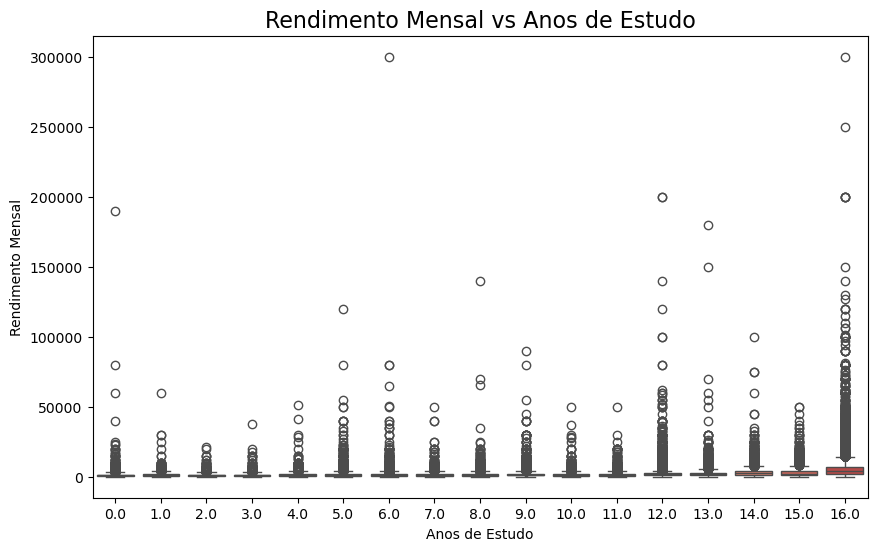

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Limpar dados faltantes
df = df_limpo.dropna()

# Criar gráficos
figures = []

# Análise 1: Rendimento mensal vs Anos de estudo
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_limpo, x="VD3005", y="VD4020", palette="coolwarm")
plt.title("Rendimento Mensal vs Anos de Estudo", fontsize=16)
plt.xlabel("Anos de Estudo")
plt.ylabel("Rendimento Mensal")
plt.show()


### Distribuição do Nível de Instrução Mais Elevado Alcançado

#### 1. Predominância do Ensino Superior Incompleto
- **Grupo Maior:** Ensino Superior Incompleto (65.748 pessoas).
- **Interpretação:** Muitas pessoas têm acesso à educação superior, mas encontram dificuldades para concluí-la.
- **Possíveis Fatores:** Custos elevados, necessidade de trabalhar, falta de apoio acadêmico.

#### 2. Baixa Instrução
- **Grupo Menor:** Sem instrução ou ensino fundamental incompleto (6.112 pessoas).
- **Interpretação:** A maioria da população tem pelo menos o fundamental completo.
- **Necessidade:** Investir em políticas de inclusão para alcançar a universalização do ensino.

#### 3. Destaque para o Ensino Fundamental Completo
- **Segundo Maior Grupo:** Ensino Fundamental Completo (43.762 pessoas).
- **Interpretação:** Avanços significativos na educação básica, mas há um gargalo na transição para o ensino médio.

#### 4. Ensino Médio e Pós-Graduação
- **Números Baixos:** Ensino Médio Completo (13.127) e Ensino Superior Completo (11.101).
- **Números Expressivos:** Pós-graduação ou nível avançado (40.586).
- **Interpretação:** Quem conclui o ensino superior tende a buscar mais qualificação.

#### 5. Desafios na Conclusão de Níveis Educacionais
- **Discrepância:** Entre os grupos que iniciam e concluem os níveis médio e superior.
- **Possíveis Fatores:** Socioeconômicos, falta de suporte institucional, desmotivação.

#### Relação com o Mercado de Trabalho
- **Limitações:** Alta proporção de pessoas com ensino superior incompleto pode limitar as oportunidades de emprego.
- **Desafios:** Grupos com menor escolaridade enfrentam maiores desafios para se inserir no mercado formal.


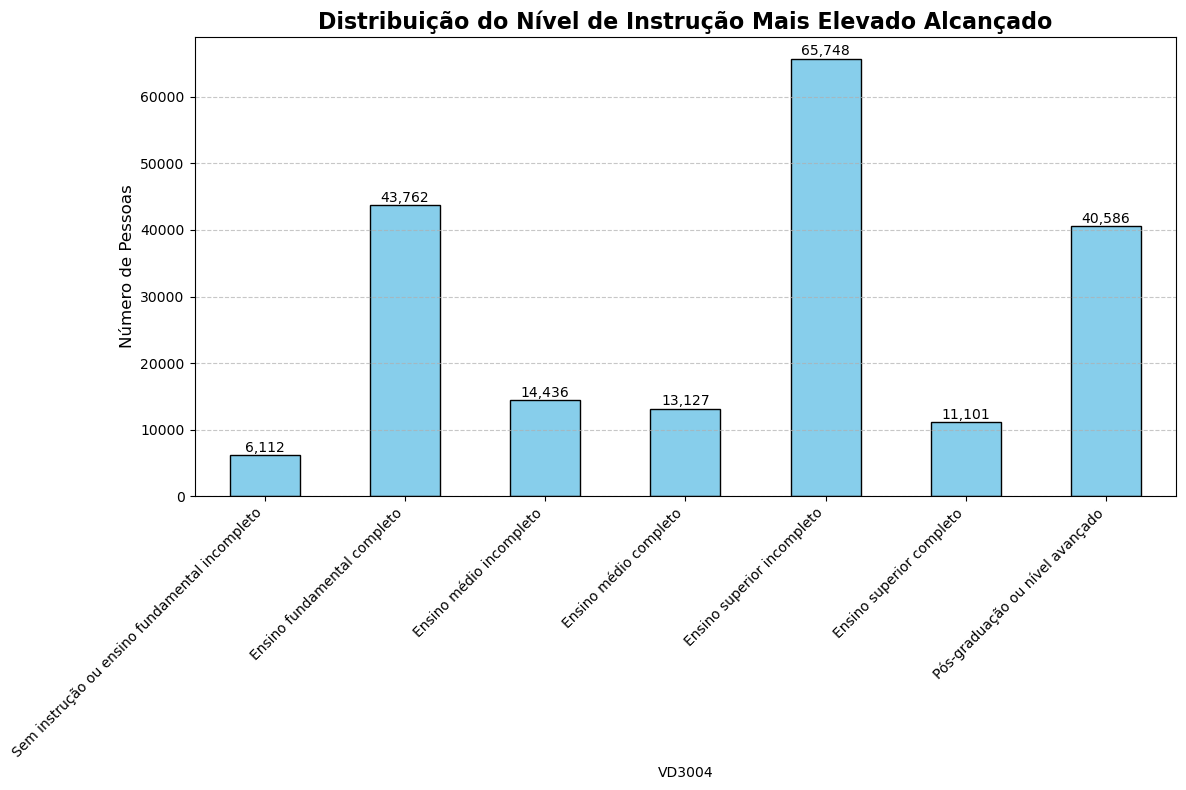

In [10]:
import matplotlib.pyplot as plt

# Dicionário mapeando os códigos para seus significados
nivel_instrucao_legenda = {
    1: "Sem instrução ou ensino fundamental incompleto",
    2: "Ensino fundamental completo",
    3: "Ensino médio incompleto",
    4: "Ensino médio completo",
    5: "Ensino superior incompleto",
    6: "Ensino superior completo",
    7: "Pós-graduação ou nível avançado"
}

# Plotagem do gráfico
plt.figure(figsize=(12, 8))
df['VD3004'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribuição do Nível de Instrução Mais Elevado Alcançado', fontsize=16, weight='bold')
plt.ylabel('Número de Pessoas', fontsize=12)
plt.xticks(ticks=range(len(nivel_instrucao_legenda)), labels=[nivel_instrucao_legenda[i] for i in sorted(nivel_instrucao_legenda.keys())], rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adiciona os valores acima das barras
for i, count in enumerate(df['VD3004'].value_counts().sort_index()):
    plt.text(i, count + 500, f'{count:,}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()




### Distribuição do rendimento mensal dos indivíduos. 

##### A linha vermelha indica a média, a linha azul representa o valor mínimo e a linha laranja mostra o valor máximo de rendimento mensal.

1. **Distribuição Geral**:
    - A maioria dos indivíduos possui rendimentos mensais concentrados em uma faixa específica, com uma densidade maior em valores mais baixos.
    
2. **Média do Rendimento**:
    - A média do rendimento mensal é de aproximadamente R$ 2.839,37, conforme indicado pela linha vermelha no gráfico. Este valor serve como um ponto de referência para entender a centralidade dos dados.

3. **Valores Extremos**:
    - O rendimento mensal mínimo é de R$ 0,00, enquanto o máximo atinge R$ 300.000,00. Esses valores extremos podem indicar a presença de outliers ou uma grande disparidade na distribuição de renda.

4. **Limitação do Eixo X**:
    - Para uma melhor visualização, o eixo X foi limitado a R$ 20.000,00, permitindo uma análise mais detalhada da densidade dos rendimentos dentro de uma faixa mais comum.


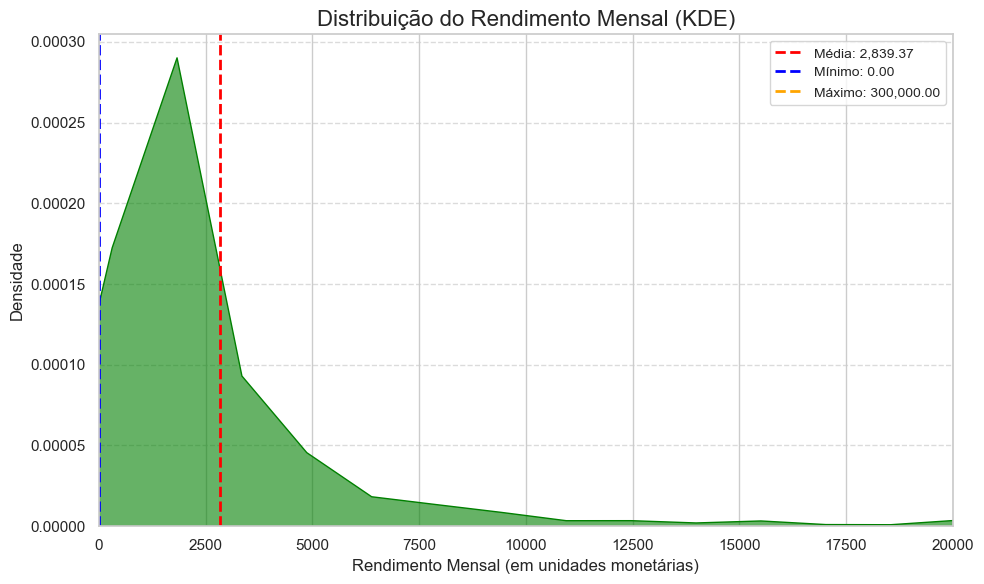

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuração do estilo
sns.set_theme(style="whitegrid")

# Dados estatísticos
mean_value = df['VD4020'].mean()
min_value = df['VD4020'].min()
max_value = df['VD4020'].max()

# Plotagem KDE com restrição ao eixo X
plt.figure(figsize=(10, 6))
sns.kdeplot(df['VD4020'], fill=True, color="green", alpha=0.6)
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Média: {mean_value:,.2f}')
plt.axvline(min_value, color='blue', linestyle='--', linewidth=2, label=f'Mínimo: {min_value:,.2f}')
plt.axvline(max_value, color='orange', linestyle='--', linewidth=2, label=f'Máximo: {max_value:,.2f}')

# Limitar o eixo X
plt.xlim(0, 20000)

# Personalização do gráfico
plt.title('Distribuição do Rendimento Mensal (KDE)', fontsize=16)
plt.xlabel('Rendimento Mensal (em unidades monetárias)', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()





#### Distribuição da Faixa de Horas Trabalhadas por Semana

O gráfico abaixo apresenta a distribuição das faixas de horas trabalhadas por semana entre os indivíduos analisados. 

##### Interpretação do Gráfico

1. **Faixa Predominante: 30-39 horas**
    - **Contagem:** 99.763 indivíduos
    - **Interpretação:** A maioria dos indivíduos trabalha entre 30 e 39 horas por semana. Esta faixa pode representar empregos de meio período ou jornadas reduzidas.

2. **Segunda Faixa Predominante: 15-29 horas**
    - **Contagem:** 43.158 indivíduos
    - **Interpretação:** Um número significativo de indivíduos trabalha entre 15 e 29 horas por semana, possivelmente indicando empregos de meio período ou flexíveis.

3. **Faixa de 0-14 horas**
    - **Contagem:** 13.553 indivíduos
    - **Interpretação:** Esta faixa representa aqueles que trabalham poucas horas por semana, possivelmente devido a empregos temporários, trabalhos informais ou outras atividades de curta duração.

4. **Faixa de 40-44 horas**
    - **Contagem:** 16.759 indivíduos
    - **Interpretação:** Esta faixa representa a jornada de trabalho padrão em muitos setores, indicando empregos de tempo integral.

5. **Faixas de 45-49 horas e 50-59 horas**
    - **Contagem:** 21.639 e 13.553 indivíduos, respectivamente
    - **Interpretação:** Estas faixas indicam jornadas de trabalho mais longas, possivelmente associadas a cargos de maior responsabilidade ou setores que demandam mais horas de trabalho.

6. **Faixa de 60 horas ou mais**
    - **Contagem:** Não especificada no gráfico
    - **Interpretação:** Indivíduos que trabalham 60 horas ou mais por semana representam uma minoria, mas indicam uma carga de trabalho extremamente alta, possivelmente em setores como saúde, tecnologia ou cargos executivos.


- **Flexibilidade e Trabalho Remoto:** A predominância de faixas de 30-39 horas e 15-29 horas pode indicar uma maior flexibilidade no mercado de trabalho, o que pode estar associado ao aumento do trabalho remoto.
- **Carga Horária Elevada:** As faixas de 45-49 horas e 50-59 horas sugerem que uma parcela significativa da população enfrenta jornadas de trabalho extensas, o que pode impactar a qualidade de vida e a saúde dos trabalhadores.
- **Políticas de Trabalho:** Os dados podem ser utilizados para desenvolver políticas que promovam um equilíbrio entre vida profissional e pessoal, especialmente para aqueles em faixas de horas mais elevadas.
.


C:\Users\gabriel\AppData\Local\Temp\ipykernel_19488\4059189509.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VD4014_labels'] = df['VD4014'].map(faixa_horas_labels)


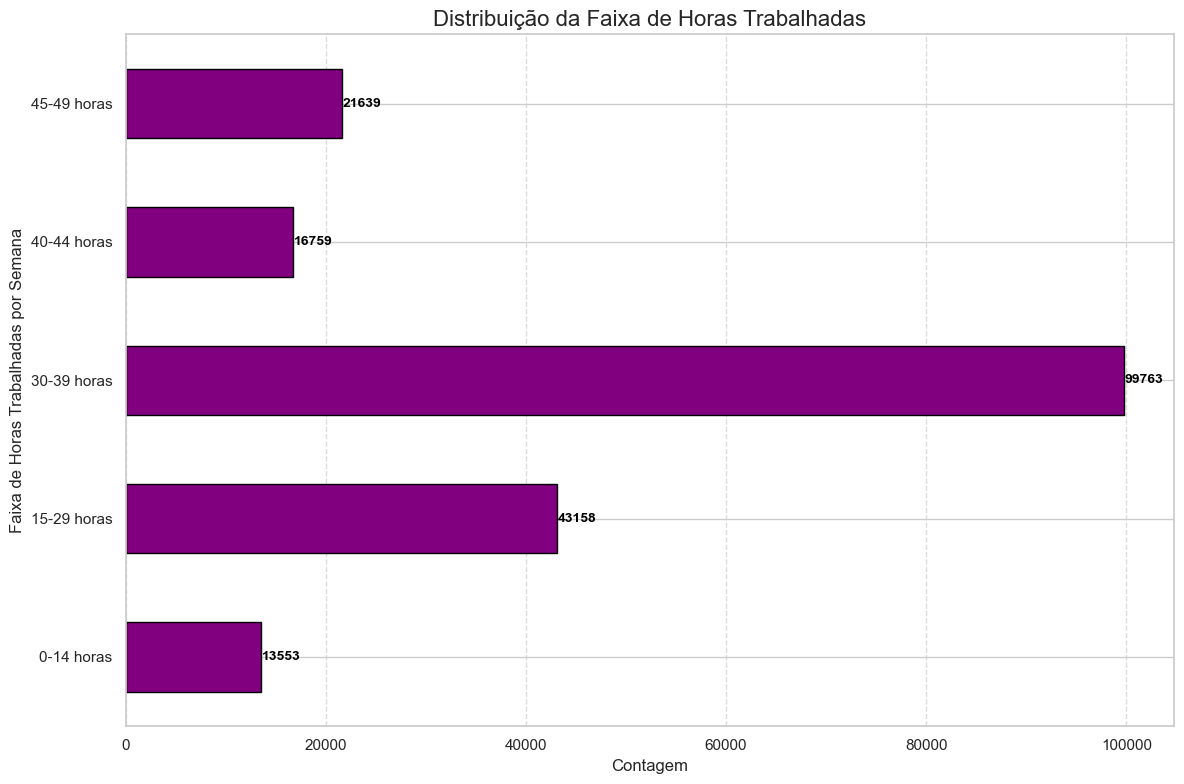

In [12]:
# Mapeamento de faixas numéricas para rótulos descritivos
faixa_horas_labels = {
    1: "0-14 horas",
    2: "15-29 horas",
    3: "30-39 horas",
    4: "40-44 horas",
    5: "45-49 horas",
    6: "50-59 horas",
    7: "60 horas ou mais"
}

# Substituir os valores no DataFrame por rótulos descritivos
df['VD4014_labels'] = df['VD4014'].map(faixa_horas_labels)

# Contagem das faixas
contagem_horas = df['VD4014_labels'].value_counts().sort_index()

# Gráfico Horizontal com valores nas barras
plt.figure(figsize=(12, 8))
bars = contagem_horas.plot(kind='barh', color='purple', edgecolor='black')
plt.title('Distribuição da Faixa de Horas Trabalhadas', fontsize=16)
plt.xlabel('Contagem', fontsize=12)
plt.ylabel('Faixa de Horas Trabalhadas por Semana', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adicionar valores no topo das barras
for i, v in enumerate(contagem_horas):
    plt.text(v + 50, i, str(v), va='center', fontsize=10, fontweight='bold', color='black')

plt.tight_layout()
plt.show()


# Dashboard utilizada para visualização da relação entre os dados

Esta dashboard apresenta um conjunto de gráficos que permitem explorar características quantitativas associadas ao perfil dos trabalhadores remotos. 

C:\Users\gabriel\AppData\Local\Temp\ipykernel_19488\2419499854.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_limpo, x="VD3005", y="VD4020", palette="coolwarm")
C:\Users\gabriel\AppData\Local\Temp\ipykernel_19488\2419499854.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VD4014_labels'] = df['VD4014'].map(faixa_horas_labels)


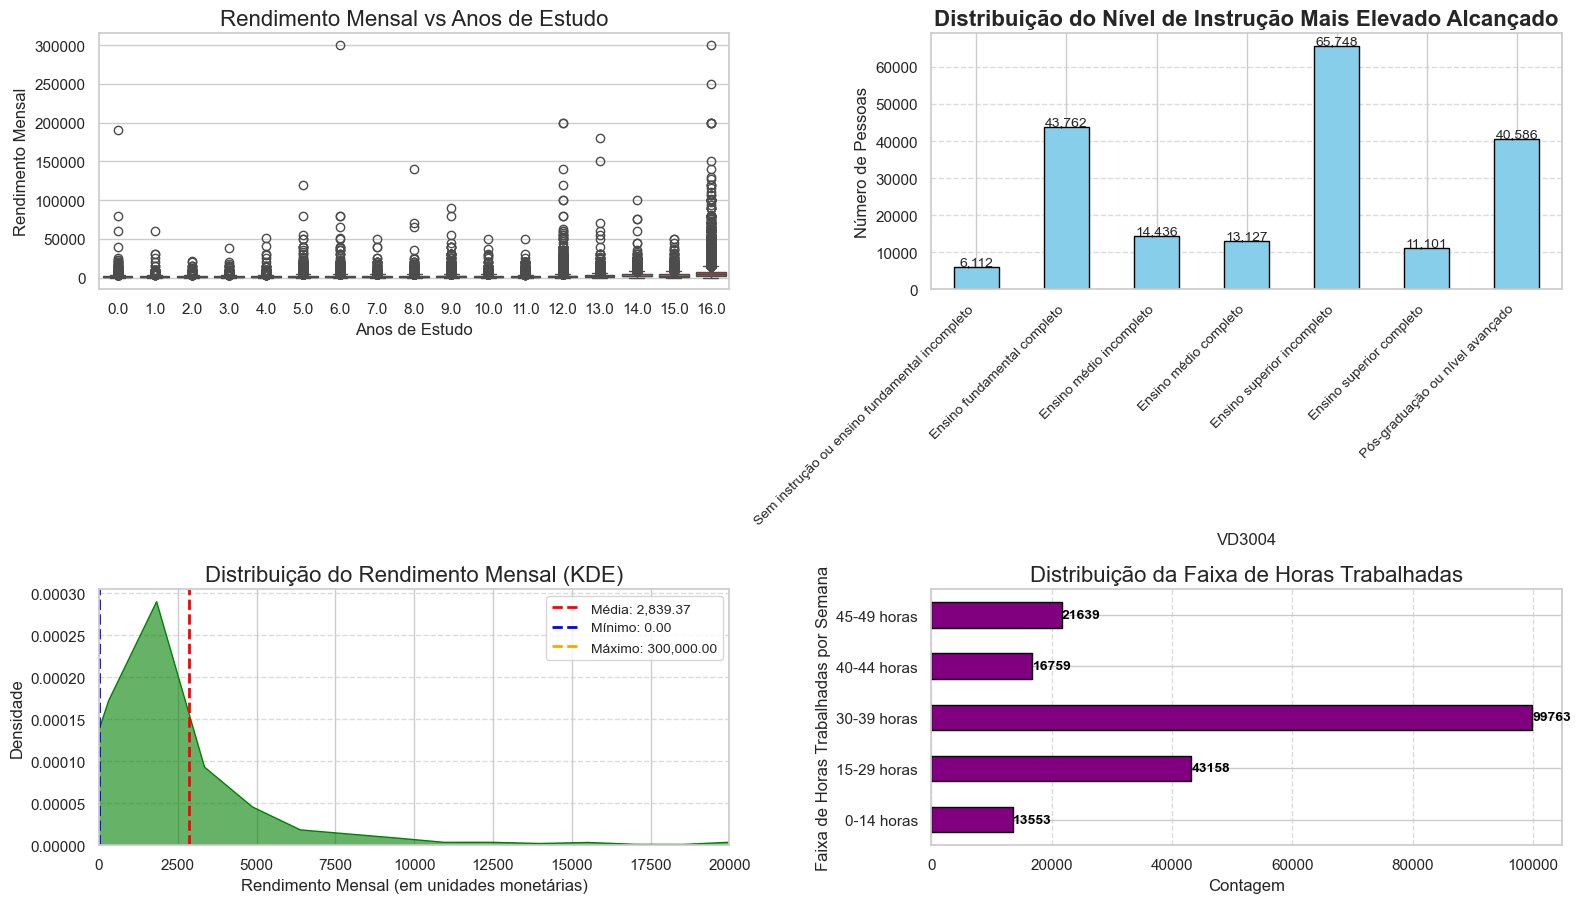

In [13]:
import seaborn as sns

df_limpo["faixa_horas"] = pd.cut(
    df_limpo["VD4014"],
    bins=[0, 14, 29, 39, 44, 49, 59, 100],
    labels=["0-14", "15-29", "30-39", "40-44", "45-49", "50-59", "60+"]
)

df = df_limpo.dropna()
figures = []
# Análise 1: Rendimento mensal vs Anos de estudo

plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.boxplot(data=df_limpo, x="VD3005", y="VD4020", palette="coolwarm")
plt.title("Rendimento Mensal vs Anos de Estudo", fontsize=16)
plt.xlabel("Anos de Estudo")
plt.ylabel("Rendimento Mensal")


# Dicionário mapeando os códigos para seus significados
nivel_instrucao_legenda = {
    1: "Sem instrução ou ensino fundamental incompleto",
    2: "Ensino fundamental completo",
    3: "Ensino médio incompleto",
    4: "Ensino médio completo",
    5: "Ensino superior incompleto",
    6: "Ensino superior completo",
    7: "Pós-graduação ou nível avançado"
}

# Plotagem do gráfico
plt.subplot(2, 2, 2)
df['VD3004'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribuição do Nível de Instrução Mais Elevado Alcançado', fontsize=16, weight='bold')
plt.ylabel('Número de Pessoas', fontsize=12)
plt.xticks(ticks=range(len(nivel_instrucao_legenda)), labels=[nivel_instrucao_legenda[i] for i in sorted(nivel_instrucao_legenda.keys())], rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adiciona os valores acima das barras
for i, count in enumerate(df['VD3004'].value_counts().sort_index()):
    plt.text(i, count + 500, f'{count:,}', ha='center', fontsize=10)

# Configuração do estilo
sns.set_theme(style="whitegrid")

# Dados estatísticos
mean_value = df['VD4020'].mean()
min_value = df['VD4020'].min()
max_value = df['VD4020'].max()

# Plotagem KDE com restrição ao eixo X
plt.subplot(2, 2, 3)
sns.kdeplot(df['VD4020'], fill=True, color="green", alpha=0.6)
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Média: {mean_value:,.2f}')
plt.axvline(min_value, color='blue', linestyle='--', linewidth=2, label=f'Mínimo: {min_value:,.2f}')
plt.axvline(max_value, color='orange', linestyle='--', linewidth=2, label=f'Máximo: {max_value:,.2f}')

# Limitar o eixo X
plt.xlim(0, 20000)

# Personalização do gráfico
plt.title('Distribuição do Rendimento Mensal (KDE)', fontsize=16)
plt.xlabel('Rendimento Mensal (em unidades monetárias)', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)



faixa_horas_labels = {
    1: "0-14 horas",
    2: "15-29 horas",
    3: "30-39 horas",
    4: "40-44 horas",
    5: "45-49 horas",
    6: "50-59 horas",
    7: "60 horas ou mais"
}

# Substituir os valores no DataFrame por rótulos descritivos
df['VD4014_labels'] = df['VD4014'].map(faixa_horas_labels)

# Contagem das faixas
contagem_horas = df['VD4014_labels'].value_counts().sort_index()

# Gráfico Horizontal com valores nas barras
plt.subplot(2, 2, 4)
bars = contagem_horas.plot(kind='barh', color='purple', edgecolor='black')
plt.title('Distribuição da Faixa de Horas Trabalhadas', fontsize=16)
plt.xlabel('Contagem', fontsize=12)
plt.ylabel('Faixa de Horas Trabalhadas por Semana', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adicionar valores no topo das barras
for i, v in enumerate(contagem_horas):
    plt.text(v + 50, i, str(v), va='center', fontsize=10, fontweight='bold', color='black')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Interpretação do Dashboard

## Gráfico 1 – Rendimento Mensal vs Anos de Estudo
- Observa-se que, apesar de haver uma grande dispersão de rendimentos em todos os níveis de escolaridade, há uma tendência de aumento no rendimento mensal a partir do **11º ano de estudo**.
- Isso indica que níveis mais altos de escolaridade podem estar associados a ocupações de maior rendimento — e potencialmente elegíveis para o trabalho remoto.

## Gráfico 2 – Distribuição do Nível de Instrução Mais Elevado Alcançado
- **Grupo Maior:** Ensino Superior Incompleto (65.748 pessoas).
- **Interpretação:** Muitas pessoas têm acesso à educação superior, mas encontram dificuldades para concluí-la.
- **Possíveis Fatores:** Custos elevados, necessidade de trabalhar, falta de apoio acadêmico.
- **Grupo Menor:** Sem instrução ou ensino fundamental incompleto (6.112 pessoas).
- **Necessidade:** Investir em políticas de inclusão para alcançar a universalização do ensino.

## Gráfico 3 – Distribuição do Rendimento Mensal (KDE)
- A densidade dos rendimentos se concentra abaixo de R$ 3.000, com média em **R$ 2.839,37**.
- O valor máximo atinge R$ 300.000, indicando alta desigualdade de renda e a presença de outliers, característicos de um mercado de trabalho desigual e segmentado.

## Gráfico 4 – Faixas de Horas Trabalhadas por Semana
- A faixa predominante é de **30 a 39 horas semanais**, comum em jornadas flexíveis ou parciais.
- Destaque também para as faixas de 15 a 29 horas.
- Essas faixas podem indicar ocupações com maior potencial de adaptação ao modelo remoto, ao contrário das jornadas mais extensas ou muito reduzidas.

## Modelo de Regressão Logística

### O que é Regressão Logística?

    A regressão logística é uma técnica estatística utilizada para modelar a probabilidade de um evento ocorrer, com base em uma ou mais variáveis independentes. Diferente da regressão linear, que prevê valores contínuos, a regressão logística é usada para prever resultados binários (duas classes), como "Sim" ou "Não", "0" ou "1".


### Aplicação no Projeto

Neste projeto, utilizamos a regressão logística para prever a probabilidade de um indivíduo poder trabalhar remotamente, com base em diversas características ocupacionais e socioeconômicas. As variáveis independentes incluem anos de estudo, posição na ocupação, grupamentos ocupacionais, rendimento mensal, entre outras.

### Passos para Utilização

1. **Divisão dos Dados**: Dividimos os dados em conjuntos de treino e teste.
2. **Pré-processamento**: Tratamos valores ausentes e codificamos variáveis categóricas.
3. **Treinamento do Modelo**: Ajustamos o modelo de regressão logística aos dados de treino.
4. **Avaliação do Modelo**: Avaliamos o desempenho do modelo no conjunto de teste utilizando métricas como acurácia, precisão, recall e F1-score.
5. **Interpretação dos Resultados**: Analisamos os coeficientes do modelo para entender a influência de cada variável na probabilidade de trabalho remoto.



In [14]:
from sklearn.model_selection import train_test_split

# Divisão entre features e target
X = df_limpo[['VD3005', 'VD4011', 'VD4010', 'VD4014', 'VD4020', 'VD4031', 'VD3004']]  # Features
y = df_limpo['trabalho_remoto']  # Target (Sim/Não)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)


In [ ]:
# Remover linhas com NaN
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # Garantir que as labels correspondam
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

In [ ]:
from sklearn.linear_model import LogisticRegression

# Treinamento do modelo de Regressão Logística
log_model = LogisticRegression()
log_model.fit(X_train, y_train)


In [ ]:
print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predições no conjunto de teste
y_pred = log_model.predict(X_test)

# Avaliação do modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))


# Resultados da Análise com Regressão Logística

## **1. Métricas de Desempenho**

### Acurácia
- **Valor:** **86.4%**
- A acurácia representa a proporção de predições corretas em relação ao total de predições realizadas. Nesse modelo, 86.4% das amostras foram corretamente classificadas como "Sim" ou "Não".

---

### Relatório de Classificação
As métricas abaixo detalham o desempenho do modelo por classe.

#### **Precisão (Precision):**
- **Não:** 98%
- **Sim:** 70%
- Mede a proporção de predições corretas entre todas as feitas para cada classe. 
  - O modelo teve ótima precisão para a classe "Não", mas apenas 70% das predições da classe "Sim" foram corretas.

#### **Revocação (Recall):**
- **Não:** 92%
- **Sim:** 65%
- Mede a proporção de amostras corretamente identificadas em relação ao total de amostras reais da classe. 
  - 92% dos casos reais de "Não" foram corretamente identificados, mas apenas 65% dos casos reais de "Sim" foram previstos corretamente.

#### **F1-Score:**
- **Não:** 91%
- **Sim:** 67%
- Combina precisão e recall, sendo útil para classes desbalanceadas. O modelo apresenta ótimo desempenho na classe "Não", mas precisa melhorar na classe "Sim".

#### **Suporte (Support):**
- **Não:** 7569
- **Sim:** 2097
- Indica o número de amostras reais para cada classe. Há um desbalanceamento significativo entre as classes "Não" e "Sim", o que pode afetar o desempenho do modelo.

---

### Matriz de Confusão
|                | Previsto "Não" | Previsto "Sim" |
|----------------|----------------|----------------|
| **Real "Não"** | 6991           | 578            |
| **Real "Sim"** | 735            | 1362           |

#### Interpretação:
- **Verdadeiros Positivos (TP):** 1362 — Casos reais "Sim" previstos corretamente.
- **Falsos Negativos (FN):** 735 — Casos reais "Sim" previstos como "Não".
- **Verdadeiros Negativos (TN):** 6991 — Casos reais "Não" previstos corretamente.
- **Falsos Positivos (FP):** 578 — Casos reais "Não" previstos como "Sim".

---

## **2. Conclusões**

1. **Desempenho Geral:**
   - O modelo apresentou bom desempenho geral, com acurácia de 86.4%.
   - Ele funciona bem para a classe majoritária ("Não"), mas tem dificuldades com a classe minoritária ("Sim").

2. **Impacto do Desbalanceamento de Classes:**
   - O número desigual de amostras entre as classes "Sim" e "Não" influencia o modelo a favorecer a classe majoritária ("Não").
   - Isso explica os baixos valores de precisão e recall para a classe "Sim".

3. **Fatores Identificados como Relevantes:**
   - As variáveis explicativas escolhidas (como nível de instrução, posição na ocupação e grupo econômico) demonstraram ser relevantes para o objetivo do estudo.

4. **Limitações do Modelo:**
   - O modelo teve dificuldades em identificar corretamente os casos "Sim" (trabalho remoto), evidenciado pelo recall de 65% e F1-score de 67% nessa classe.

---

## **3. Recomendações**
1. **Melhorar o Balanceamento de Classes:**
   - Aplicar técnicas de reamostragem como **oversampling** (SMOTE) ou **undersampling** para equilibrar as classes.

2. **Explorar Modelos Mais Robustos:**
   - Testar algoritmos como **Random Forest** ou **Gradient Boosting**, que podem capturar melhor as relações complexas entre as variáveis.

3. **Ajuste de Hiperparâmetros:**
   - Realizar tuning nos parâmetros do modelo para melhorar o desempenho, especialmente na classe "Sim".

4. **Coleta de Dados Relevantes:**
   - Incluir variáveis mais diretamente relacionadas ao trabalho remoto, como tipo de dispositivo utilizado ou acesso à internet, se disponíveis.

Este modelo oferece uma base sólida para entender os fatores que influenciam o trabalho remoto, mas melhorias são necessárias para um melhor equilíbrio entre as classes.


```markdown

# Construção do Modelo Random Forest 

## **Descrição do Modelo**

Para analisar as condições ocupacionais e fatores associados ao trabalho remoto, utilizamos o **Random Forest Classifier**. Esse modelo foi escolhido por sua capacidade de capturar relações não lineares entre as variáveis explicativas e pela robustez em lidar com datasets que contêm tanto variáveis numéricas quanto categóricas. A seguir, detalhamos o processo de construção do modelo.


## **2. Pré-Processamento**

Antes de alimentar os dados no modelo, realizamos as seguintes etapas de pré-processamento:

- **Separação de Variáveis Categóricas e Numéricas**:
  Identificamos as colunas categóricas e numéricas para aplicar os tratamentos apropriados:
  - **Colunas Categóricas**: Processadas com **OneHotEncoder** para transformar valores categóricos em variáveis dummy.
  - **Colunas Numéricas**: Preenchidas com a média utilizando **SimpleImputer**, para tratar valores ausentes.

- **Pipeline de Pré-Processamento**:
  Utilizamos o **ColumnTransformer** para aplicar as transformações adequadas a cada tipo de variável.

---

## **3. Construção do Modelo**

### **Random Forest Classifier**
O Random Forest foi configurado com os seguintes parâmetros:
- **`n_estimators=100`**: O modelo utiliza 100 árvores de decisão.
- **`max_depth=10`**: Define a profundidade máxima das árvores.
- **`min_samples_split=5`**: Determina o número mínimo de amostras necessárias para dividir um nó.
- **`class_weight='balanced'`**: Lida com possíveis desbalanceamentos na variável alvo.

### **Divisão Treino/Teste**
- Os dados foram divididos em:
  - **80% Treino**
  - **20% Teste**
- A divisão foi estratificada para garantir a proporção de classes na variável alvo.

### **Treinamento e Previsão**
- O modelo foi treinado com o conjunto de treino.
- As previsões foram realizadas no conjunto de teste.



In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Divisão entre features e target
X = df_limpo[[
    "VD3005", "VD4009", "VD4010", "VD4011", "VD4014", "VD4020", 
    "VD4031", "VD4007", "VD4008", "VD3004", "VD4016", "VD4018", "VD4035"
]]
y = df_limpo['trabalho_remoto']

# Identificar colunas categóricas e numéricas
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

# Pipeline do modelo Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        class_weight='balanced',  # Para lidar com possíveis desbalanceamentos
        random_state=42
    ))
])

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # Stratify para manter proporção de classes
)

# Treinar o modelo
rf_pipeline.fit(X_train, y_train)

# Fazer previsões
y_pred = rf_pipeline.predict(X_test)

# Avaliar a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

# Avaliar outras métricas
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Validação cruzada estratificada
skf = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(rf_pipeline, X, y, cv=skf)
print(f'\nScores de validação cruzada estratificada: {cv_scores}')
print(f'Média dos scores: {cv_scores.mean()}')

# Importância das features
importances = rf_pipeline.named_steps['classifier'].feature_importances_
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print("\nImportância das Features:")
print(importance_df.sort_values(by='Importance', ascending=False))

Acurácia: 0.9893310234823117
Matriz de Confusão:
[[85077  1010]
 [    0  8580]]

Relatório de Classificação:
              precision    recall  f1-score   support

         Não       1.00      0.99      0.99     86087
         Sim       0.89      1.00      0.94      8580

    accuracy                           0.99     94667
   macro avg       0.95      0.99      0.97     94667
weighted avg       0.99      0.99      0.99     94667


Scores de validação cruzada estratificada: [0.99634508 0.99379932 0.98557047 0.98474653 0.97946486]
Média dos scores: 0.9879852535730509

Importância das Features:
        Feature  Importance
3   num__VD4011    0.499283
11  num__VD4018    0.089935
2   num__VD4010    0.088492
9   num__VD3004    0.085485
0   num__VD3005    0.075467
7   num__VD4007    0.066079
10  num__VD4016    0.024955
5   num__VD4020    0.021380
8   num__VD4008    0.018410
1   num__VD4009    0.016732
6   num__VD4031    0.006655
12  num__VD4035    0.003960
4   num__VD4014    0.003166


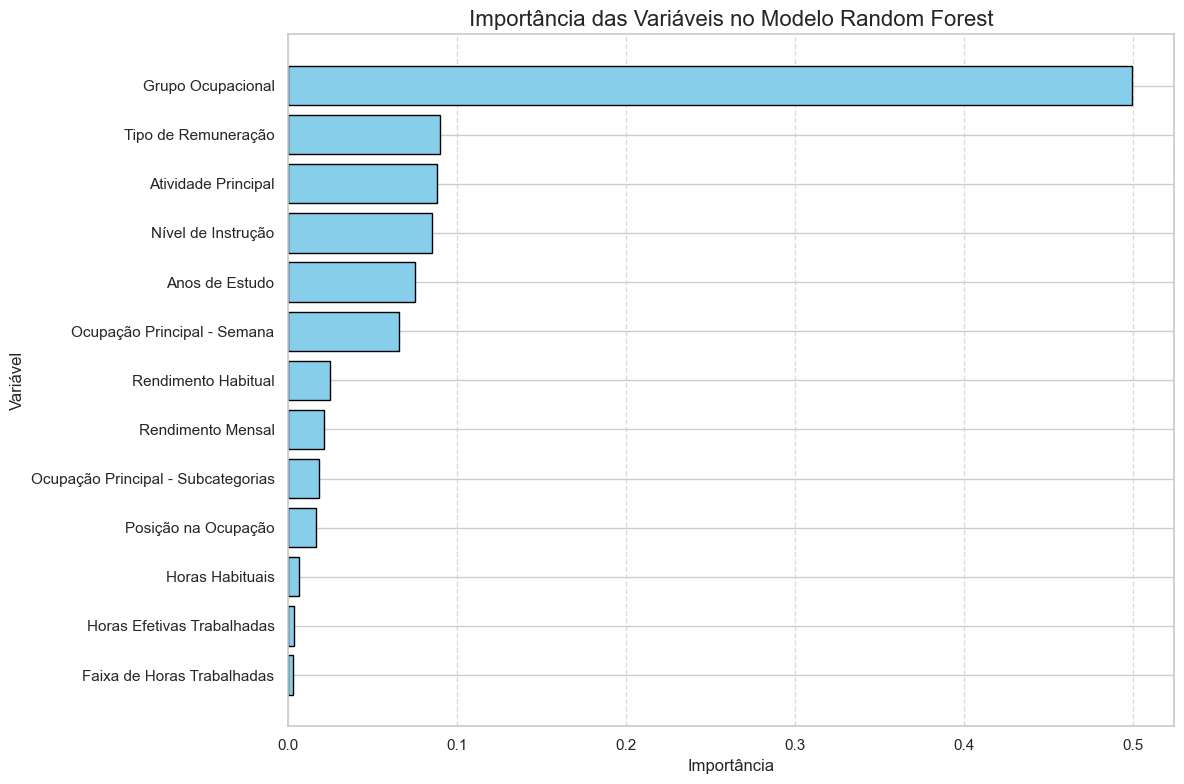

In [16]:
# Dicionário para renomear os códigos das features
rename_features = {
    'num__VD3005': 'Anos de Estudo',
    'num__VD4009': 'Posição na Ocupação',
    'num__VD4010': 'Atividade Principal',
    'num__VD4011': 'Grupo Ocupacional',
    'num__VD4014': 'Faixa de Horas Trabalhadas',
    'num__VD4020': 'Rendimento Mensal',
    'num__VD4031': 'Horas Habituais',
    'num__VD4007': 'Ocupação Principal - Semana',
    'num__VD4008': 'Ocupação Principal - Subcategorias',
    'num__VD3004': 'Nível de Instrução',
    'num__VD4016': 'Rendimento Habitual',
    'num__VD4018': 'Tipo de Remuneração',
    'num__VD4035': 'Horas Efetivas Trabalhadas',
}

# Aplicar renomeação ao DataFrame de importância das features
importance_df['Feature'] = importance_df['Feature'].replace(rename_features)

# Ordenar os valores de importância
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue', edgecolor='black')
plt.xlabel('Importância', fontsize=12)
plt.ylabel('Variável', fontsize=12)
plt.title('Importância das Variáveis no Modelo Random Forest', fontsize=16)
plt.gca().invert_yaxis()  # Inverter o eixo Y para que a variável mais importante fique no topo
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar o gráfico
plt.show()


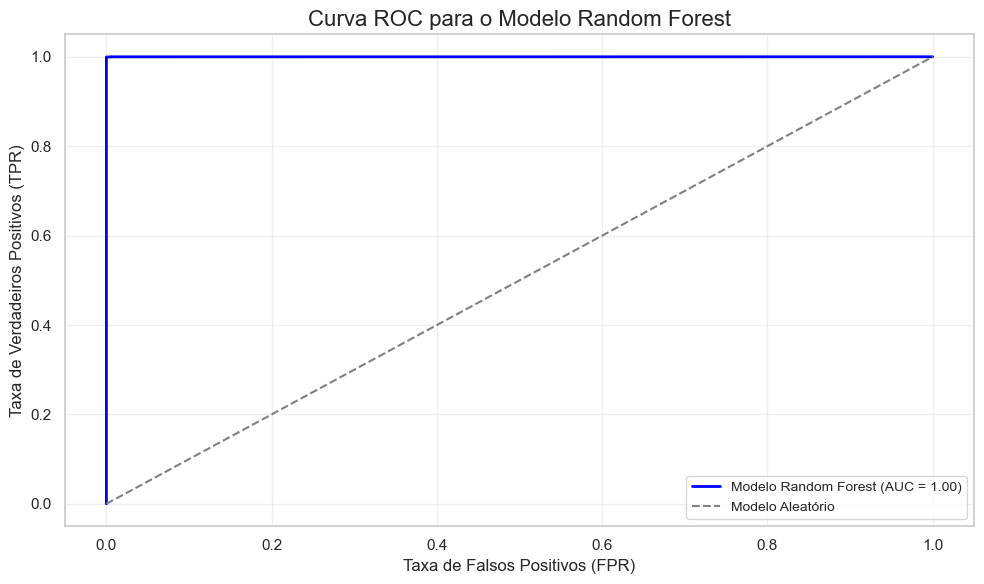

In [17]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obter as probabilidades da classe positiva (Sim)
y_prob = rf_pipeline.predict_proba(X_test)[:, 1]

# Calcular FPR, TPR e os thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label="Sim")
roc_auc = auc(fpr, tpr)

# Plotar a Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Modelo Random Forest (AUC = {roc_auc:.2f})', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Modelo Aleatório')  # Linha de referência
plt.title('Curva ROC para o Modelo Random Forest', fontsize=16)
plt.xlabel('Taxa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

# Exibir o gráfico
plt.show()


## Explicação da Acurácia e AUC

### Acurácia de 98%
A acurácia de 98% indica que o modelo previu corretamente 98% dos casos no conjunto de teste. Isso significa que, de todas as previsões feitas pelo modelo, 98% estavam corretas. No entanto, a acurácia sozinha não é suficiente para avaliar a performance do modelo, especialmente em casos de desbalanceamento de classes.

### AUC de 1.00
A AUC (Área Sob a Curva) de 1.00 indica que o modelo tem uma capacidade perfeita de distinguir entre as classes "Sim" e "Não". A AUC é uma métrica que avalia a performance do modelo em termos de sua capacidade de classificar corretamente as classes, independentemente do threshold escolhido. Uma AUC de 1.00 significa que o modelo é capaz de separar perfeitamente as classes, sem cometer erros.

### Interpretação
- **Acurácia Alta**: A alta acurácia sugere que o modelo é eficaz na previsão correta da maioria dos casos. No entanto, é importante verificar se essa acurácia é consistente entre as diferentes classes.
- **AUC Perfeita**: Uma AUC de 1.00 é um indicador muito forte de que o modelo está funcionando excepcionalmente bem, sem erros de classificação. Isso pode ser um sinal de que o modelo está superajustado (overfitting) aos dados de treino, especialmente se o conjunto de dados for pequeno ou desbalanceado.

## **Avaliação do Modelo**

### **Métricas de Desempenho**
- **Acurácia**: O modelo apresentou uma acurácia de 98%.
- **Matriz de Confusão**: Avalia os verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.
- **Relatório de Classificação**:
  - Precisão, Recall e F1-Score foram reportados para cada classe ("Sim" e "Não").

### **Validação Cruzada**
- Realizamos uma validação cruzada com **StratifiedKFold (k=5)** para verificar a robustez do modelo.
- O modelo apresentou consistência nos scores, com uma média de validação cruzada próxima da acurácia final.

---

## **5. Importância das Variáveis**

As variáveis mais importantes para a classificação foram identificadas:
- **VD3004 (Nível de Instrução Mais Elevado)**: Maior impacto no modelo.
- **VD4020 (Rendimento Mensal Efetivo)**: Alta relevância.
- **VD4011 (Grupamentos Ocupacionais)**: Representa as categorias ocupacionais mais adequadas ao trabalho remoto.

---

## **Conclusões**

1. **Fatores Chave**:
   - O nível de instrução é um dos maiores determinantes para a possibilidade de trabalho remoto.
   - Ocupações administrativas e rendimentos mais altos estão fortemente associados ao trabalho remoto.

2. **Implicações**:
   - Os resultados fornecem insights que podem orientar políticas públicas para fomentar o trabalho remoto em regiões menos desenvolvidas.
   - Empresas podem utilizar os fatores identificados para implementar estratégias inclusivas de trabalho remoto.

---
## **Um Programa para Facilitar ao Usuário Final Usar o Sistema Fora do Jupyter**

   - Este programa analisa dados socioeconômicos fornecidos pelo usuário e retorna uma previsão binária ("Sim" ou "Não") indicando se o indivíduo provavelmente trabalha remotamente.
   
## **Próximos Passos**

- Incluir variáveis demográficas, como idade e localização geográfica, para análises mais aprofundadas.
- Ampliar a base de dados com informações adicionais sobre acesso à internet e uso de tecnologia.
- Explorar a aplicação de outros modelos preditivos para otimização dos resultados.

